# Hypothesis Testing - 4

- **$H_0$:**<br>
There is no signification relationship between stimulus repetition and reactions times
<br>

- **$H_1$:**<br>
Repeated stimuli have faster/slower reaction times

If the above H0 is rejected, we can further test the hypothesis as:

- **$H_0$:**<br>
There is no significant relationship between this effect and age. 
<br>

- **$H_1$:**<br>
This effect increases/decreases with age.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import shapiro

###  Data Preparation

##### We first check if there is a relationship between reaction times and stimulus repetition. 

In [2]:
e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")
e1_sub_ages = pd.read_csv("../data/e1/e1_sub_ages.csv")
e1_learning.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [39]:
e1_learning.isnull().sum()

subject_id                 0
task_part                  0
block_condition            0
block_order                0
task_block                 0
trial_index                0
stimulus                   0
cat_type                   0
mean_cat_reward            0
approach_reward            0
key_press                174
rt                       168
points                     0
stimulus_repetition        0
correct_response           0
correct_response_made    174
dtype: int64

In [40]:
e1_learning.dropna(subset=["rt"], inplace=True)

In [41]:
# Merge dataframes by subject ID
df = pd.merge(e1_learning[["subject_id", "stimulus_repetition", "rt"]], e1_sub_ages[["subject_id", "age"]], on="subject_id")
df.head()

,subject_id,stimulus_repetition,rt,age
0,3768,1,1148.0,8.04
1,3768,1,347.0,8.04
2,3768,1,618.0,8.04
3,3768,2,306.0,8.04
4,3768,1,1521.0,8.04


In [42]:
df.isnull().sum()

subject_id             0
stimulus_repetition    0
rt                     0
age                    0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46038 entries, 0 to 46037
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_id           46038 non-null  int64  
 1   stimulus_repetition  46038 non-null  int64  
 2   rt                   46038 non-null  float64
 3   age                  46038 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.4 MB


In [44]:
df.describe()

,subject_id,stimulus_repetition,rt,age
count,46038.000000,46038.000000,46038.000000,46038.000000
mean,5401.044246,2.942026,904.241448,15.882542
std,1255.106574,1.730980,375.571777,4.998539
min,3718.000000,1.000000,0.100000,8.010000
25%,4045.000000,1.000000,648.900000,11.620000
50%,5640.000000,3.000000,815.550000,15.400000
75%,6293.000000,4.000000,1065.500000,19.870000
max,8071.000000,6.000000,3023.000000,25.940000


In [26]:
# # Check for missing values
# df.dropna(subset=["rt"], inplace=True)

# # Convert infinite values to NaN
# df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [45]:
# Calculate summary statistics
summary_stats = df.groupby('stimulus_repetition')['rt'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
stimulus_repetition,,,,,,,,
1,13526.0,992.384437,395.659905,0.3,718.825,916.80,1178.850,3023.0
2,8132.0,912.419270,371.280360,0.5,659.700,826.30,1077.850,2917.6
3,8122.0,895.898129,370.295603,0.1,649.000,807.15,1048.375,2991.0
4,5416.0,852.924760,351.663504,0.1,623.475,763.75,988.875,2998.0
5,5427.0,831.326755,352.171627,5.2,610.000,735.70,952.800,2990.4
6,5415.0,808.706741,333.088636,0.6,597.000,720.10,930.750,2996.0


In [7]:
e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")

In [13]:
# Merge dataframes by subject ID
df2 = pd.merge(e1_learning[["subject_id", "stimulus_repetition"]], e1_memory[["subject_id", "rt"]], on="subject_id")
df2.head()

,subject_id,stimulus_repetition,rt
0,3768,1,1866.0
1,3768,1,1792.0
2,3768,1,3074.0
3,3768,1,1411.0
4,3768,1,3348.0


In [14]:
# Calculate summary statistics
summary_stats = df2.groupby('stimulus_repetition')['rt'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
stimulus_repetition,,,,,,,,
1,2624040.0,1455.873491,781.616973,0.9,962.3,1266.05,1717.7,9991.8
2,1574424.0,1455.873491,781.617072,0.9,962.3,1266.05,1717.7,9991.8
3,1574424.0,1455.873491,781.617072,0.9,962.3,1266.05,1717.7,9991.8
4,1049616.0,1455.873491,781.617196,0.9,962.3,1266.05,1717.7,9991.8
5,1049616.0,1455.873491,781.617196,0.9,962.3,1266.05,1717.7,9991.8
6,1049616.0,1455.873491,781.617196,0.9,962.3,1266.05,1717.7,9991.8


## Reaction time Vs Stimulus Repetition

##### Check normality of reaction times within each level of stimulus repetition

In [46]:
# Create separate data groups for each level of stimulus repetition
data_groups = {}
for repetition in range(1, 7):
    data_groups[repetition] = df[df['stimulus_repetition'] == repetition]['rt']


In [60]:
from scipy.stats import kstest

# Check normality for each group
normality_results = {}
for repetition, data in data_groups.items():
    # Perform Kolmogorov-Smirnov test for normality
    ks_stat, ks_p_val = kstest(data, 'norm')
    normality_results[repetition] = {'Statistic': ks_stat, 'P-value': ks_p_val}

normality_results

{1: {'Statistic': 0.9999260623225081, 'P-value': 0.0},
 2: {'Statistic': 0.999877029021151, 'P-value': 0.0},
 3: {'Statistic': 0.9997537552327013, 'P-value': 0.0},
 4: {'Statistic': 0.9998153618906942, 'P-value': 0.0},
 5: {'Statistic': 0.9999999003557626, 'P-value': 0.0},
 6: {'Statistic': 0.9998019820469806, 'P-value': 0.0}}

In [61]:
from scipy.stats import shapiro

# Check normality for each group
normality_results = {}
for repetition, data in data_groups.items():
    shapiro_stat, shapiro_p_val = shapiro(data)
    normality_results[repetition] = {'Statistic': shapiro_stat, 'P-value': shapiro_p_val}

normality_results


/home/shreeya/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{1: {'Statistic': 0.9234289526939392, 'P-value': 0.0},
 2: {'Statistic': 0.9013783931732178, 'P-value': 0.0},
 3: {'Statistic': 0.8893530368804932, 'P-value': 0.0},
 4: {'Statistic': 0.8728381991386414, 'P-value': 0.0},
 5: {'Statistic': 0.8467925786972046, 'P-value': 0.0},
 6: {'Statistic': 0.851370632648468, 'P-value': 0.0}}

- The reaction time data in each group does not follow a normal distribution
<br>

- Also, the p-value seems 0 but in reality it indicates that the test statistic is extremely large relative to the critical values.

#### Levene's test for homogeneity of variances

In [62]:
from scipy.stats import levene

# Check homogeneity of variances for each group
homogeneity_results = {}
for repetition, data in data_groups.items():
    try:
        levene_stat, levene_p_val = levene(*data_groups.values())
        homogeneity_results[repetition] = {'Statistic': levene_stat, 'P-value': levene_p_val}
    except Exception as e:
        homogeneity_results[repetition] = {'Statistic': None, 'P-value': None, 'Error': str(e)}

homogeneity_results


{1: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 2: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 3: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 4: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 5: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 6: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65}}

- The extremely low p-values ($<0.001$) obtained from `Levene's test` indicate strong evidence against the null hypothesis of homogeneity of variances across the groups. Therefore, we reject the null hypothesis and conclude that there are significant differences in variances between the groups. 
<br>

- Since, the data is not normally distributed, so we use the Kruskal-Wallis test to check if there is a significant difference in reaction times between the different levels of stimulus repetition.

#### Kruskal-Wallis test

In [64]:
from scipy.stats import kruskal

# Extract the reaction time data for each group
group1_rt = data_groups[1]
group2_rt = data_groups[2]
group3_rt = data_groups[3]
group4_rt = data_groups[4]
group5_rt = data_groups[5]
group6_rt = data_groups[6]

# Perform Kruskal-Wallis test
kw_stat, kw_p_val = kruskal(group1_rt, group2_rt, group3_rt, group4_rt, group5_rt, group6_rt)
print("Kruskal-Wallis Test - Statistic:", kw_stat)
print("Kruskal-Wallis Test - P-value:", kw_p_val)


Kruskal-Wallis Test - Statistic: 1966.9712649951966
Kruskal-Wallis Test - P-value: 0.0


- Based on the Kruskal-Wallis test, there is a significant difference among the groups in terms of reaction times (Kruskal-Wallis Test Statistic = $1966.97$, p < $0.001$). 
<br>

- Therefore, we reject the null hypothesis and conclude that there is a significant relationship between stimulus repetition and reaction times.


#### Post Hoc tests

- Since we have more than two groups and the Kruskal-Wallis test is significant, we need to conduct post hoc tests to determine which groups are significantly different from each other.

In [67]:
# %pip install scikit-posthocs

In [69]:
import scikit_posthocs as sp

# Extract reaction time data for each stimulus repetition group
data_groups_list = [data for repetition, data in data_groups.items()]

# Perform Dunn's post hoc test
dunn_results = sp.posthoc_dunn(data_groups_list, p_adjust='holm')

# Display the post hoc test results
print("Dunn's Post Hoc Test Results:")
dunn_results

Dunn's Post Hoc Test Results:


,1,2,3,4,5,6
1,1.000000e+00,2.393293e-64,2.837577e-94,1.596125e-155,5.119809e-225,2.377423e-279
2,2.393293e-64,1.000000e+00,2.161058e-03,2.362354e-26,4.329976e-55,9.566663e-81
3,2.837577e-94,2.161058e-03,1.000000e+00,1.888891e-14,7.169288e-37,2.872148e-58
4,1.596125e-155,2.362354e-26,1.888891e-14,1.000000e+00,1.716857e-05,8.828812e-14
5,5.119809e-225,4.329976e-55,7.169288e-37,1.716857e-05,1.000000e+00,2.161058e-03
6,2.377423e-279,9.566663e-81,2.872148e-58,8.828812e-14,2.161058e-03,1.000000e+00


- Holm correction method is used as it strikes a balance between controlling the family-wise error rate and maintaining statistical power

#### Visualisation

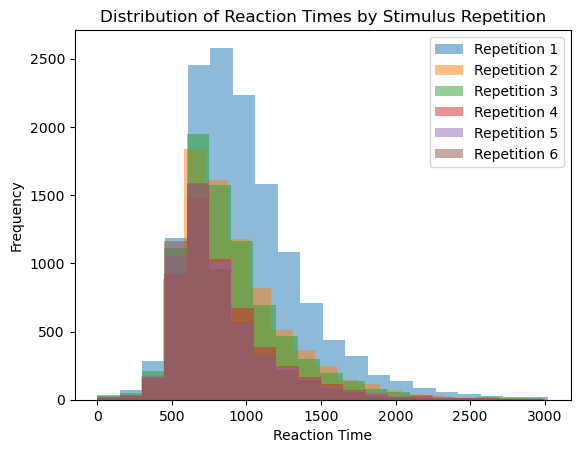

In [36]:
# Plot the distribution of reaction times for each level of stimulus repetition
for repetition, group in df.groupby('stimulus_repetition'):
    plt.hist(group['rt'], bins=20, alpha=0.5, label=f"Repetition {repetition}")

plt.xlabel("Reaction Time")
plt.ylabel("Frequency")
plt.title("Distribution of Reaction Times by Stimulus Repetition")
plt.legend()
plt.show()

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


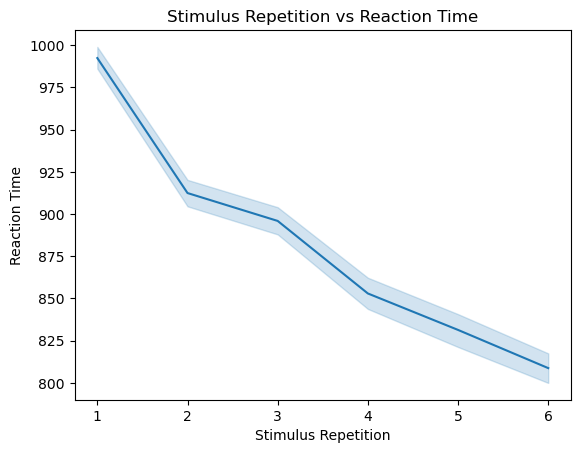

In [39]:
sns.lineplot(data=df, x='stimulus_repetition', y='rt')
plt.title("Stimulus Repetition vs Reaction Time")
plt.xlabel("Stimulus Repetition")
plt.ylabel("Reaction Time")
plt.show()

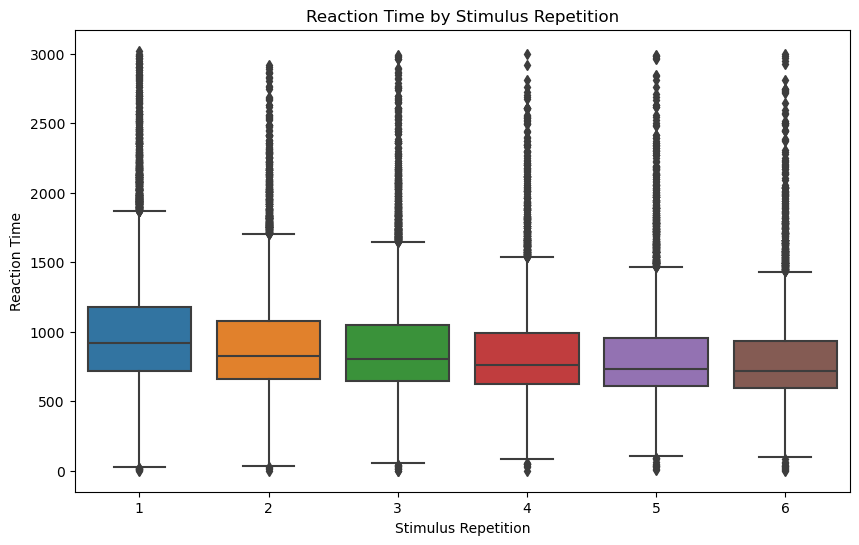

In [40]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stimulus_repetition', y='rt', data=df)
plt.title('Reaction Time by Stimulus Repetition')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Reaction Time')
plt.show()


/tmp/ipykernel_71916/3445660554.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='stimulus_repetition', y='rt', data=df, ci='sd')


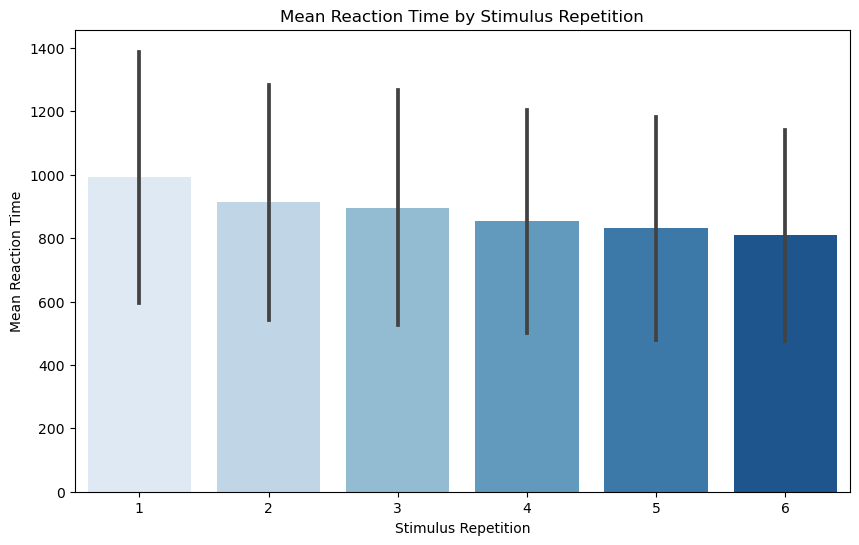

In [41]:
# Bar plot
sns.set_palette('Blues')
plt.figure(figsize=(10, 6))
sns.barplot(x='stimulus_repetition', y='rt', data=df, ci='sd')
plt.title('Mean Reaction Time by Stimulus Repetition')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Mean Reaction Time')
plt.show()

#### Inferences

- The results indicate that there is a significant relationship between stimulus repetition and reaction times. Specifically, the Kruskal-Wallis test showed a significant difference in reaction times across different levels of stimulus repetition (p < 0.05). 

- Additionally, it's important to note that the p-value obtained from the Kruskal-Wallis test was very small (p < 0.001), indicating strong evidence against the null hypothesis. This suggests that the observed differences in reaction times across stimulus repetition levels are unlikely to be due to random chance alone.

Therefore, based on the results, we reject the null hypothesis (H0) and conclude that there is a significant relationship between stimulus repetition and reaction times. Furthermore, reaction time decreases as stimulus is repeated. 

Now we will perform a regression analysis to examine the relationship between stimulus repetition, reaction times, and age. 

## Relationship between memory performance and stimulus repetition

#### Data processing

In [42]:
e1_sub_ages = pd.read_csv("../data/e1/e1_sub_ages.csv") 
e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")

# Merge dataframes
memory_merged = pd.merge(e1_memory, e1_sub_ages, on='subject_id')

In [43]:
memory_merged.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay,age
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0,8.04
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0,8.04
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0,8.04
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0,8.04
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0,8.04


In [44]:
print("\nMissing values in memory data:")
print(memory_merged.isnull().sum())

memory_merged.dropna(inplace=True)


Missing values in memory data:
subject_id                  0
task_part                   0
block_order                 0
block_condition             0
category_type               0
num_stim_rep            15504
image                       0
category                    0
task_block                  0
stim_num                    0
correct_mem_response        0
mem_response               28
confidence                 28
rt                         28
mem_acc                    28
conf_number                28
conf_rating                28
foil_type                   0
memory_delay              192
age                         0
dtype: int64


### ROC Curve Analysis - mentioned in the paper

In [45]:
from sklearn.metrics import roc_curve, auc

# Construct ROC curves and compute AUC for each combination of stimulus repetitions
def calculate_roc_auc(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc


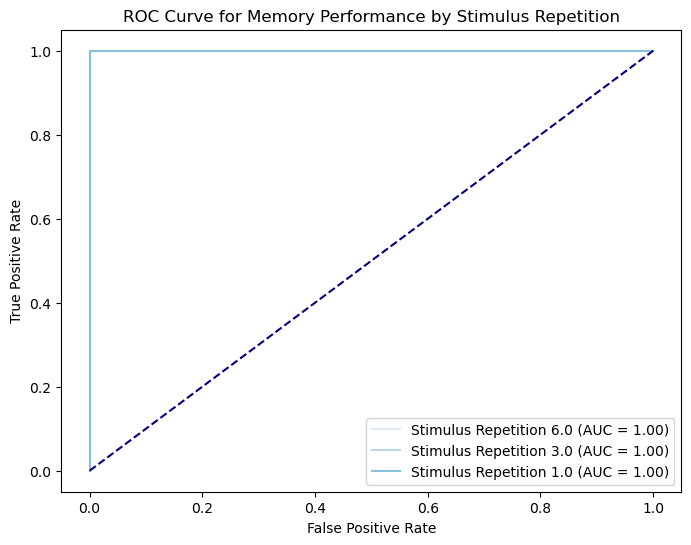

In [46]:

stimulus_repetitions = memory_merged['num_stim_rep'].unique()
plt.figure(figsize=(8, 6))
for repetition in stimulus_repetitions:
    subset_data = memory_merged[memory_merged['num_stim_rep'] == repetition]
    fpr, tpr, roc_auc = calculate_roc_auc(subset_data['mem_acc'], subset_data['mem_acc']) 
    plt.plot(fpr, tpr, label=f"Stimulus Repetition {repetition} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Memory Performance by Stimulus Repetition')
plt.legend(loc="lower right")
plt.show()


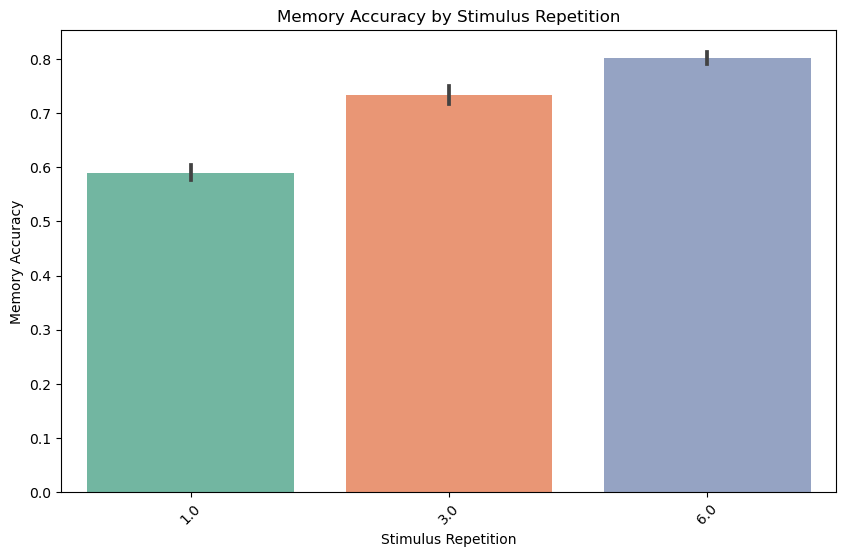

In [47]:
# Bar plot of memory accuracy by stimulus repetition
plt.figure(figsize=(10, 6))
sns.barplot(x='num_stim_rep', y='mem_acc', data=memory_merged, palette='Set2')
plt.title('Memory Accuracy by Stimulus Repetition')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Memory Accuracy')
plt.xticks(rotation=45)
plt.show()


#### chi-squared test to examine the association between mem_acc and num_stim_rep:

In [48]:
from scipy.stats import chi2_contingency

memory_data_subset = memory_merged[['mem_acc', 'num_stim_rep']]

# Create a contingency table
contingency_table = pd.crosstab(memory_data_subset['mem_acc'], memory_data_subset['num_stim_rep'])

# Perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p_value}")


Chi-squared Test Statistic: 602.4456654581097
P-value: 1.5156046271381155e-131


The p-value is extremely small (close to zero), suggesting strong evidence showing that there exists a relationship between memory accuracy and stimulus repetition. 

Now we see how this effect changes with age.

## Relationship between stimulus repetition, reaction times, and age

In [49]:
selected_data = memory_merged[['age', 'num_stim_rep', 'rt']]

#### Correlation test

In [50]:
correlation_results = {}
for repetition in selected_data['num_stim_rep'].unique():
    subset_data = selected_data[selected_data['num_stim_rep'] == repetition]
    correlation = subset_data[['age', 'rt']].corr().iloc[0, 1]
    correlation_results[repetition] = correlation


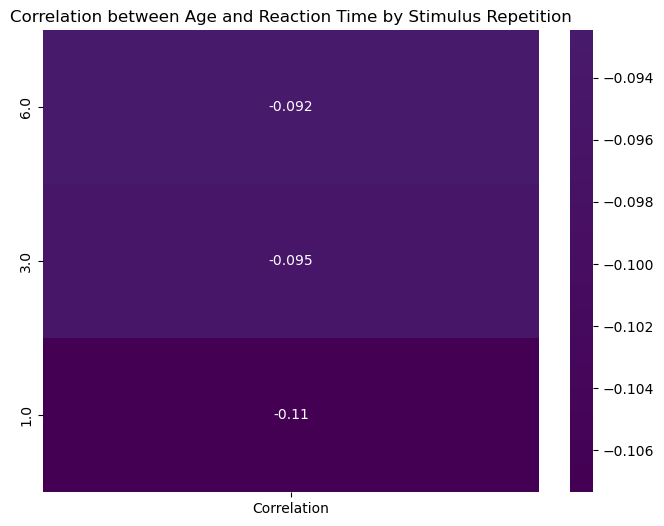

In [51]:
# heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['Correlation']).T
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation between Age and Reaction Time by Stimulus Repetition')
plt.show()


#### Regression Analysis

In [53]:
import statsmodels.api as sm

regression_results = {}
for repetition in selected_data['num_stim_rep'].unique():
    subset_data = selected_data[selected_data['num_stim_rep'] == repetition]
    X = subset_data[['age']]
    y = subset_data['rt']
    model = sm.OLS(y, sm.add_constant(X)).fit()
    regression_results[repetition] = model

In [54]:
# Summary of regression results
for repetition, model in regression_results.items():
    print(f"Regression Results for Stimulus Repetition {repetition}:")
    print(model.summary())
             

Regression Results for Stimulus Repetition 6.0:
                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     46.82
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           8.65e-12
Time:                        19:05:03   Log-Likelihood:                -43531.
No. Observations:                5430   AIC:                         8.707e+04
Df Residuals:                    5428   BIC:                         8.708e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

#### ANOVA

In [55]:
anova_results = {}
for repetition in selected_data['num_stim_rep'].unique():
    subset_data = selected_data[selected_data['num_stim_rep'] == repetition]
    age_groups = subset_data['age'].unique()
    anova_data = [subset_data[subset_data['age'] == age]['rt'].values for age in age_groups]
    f_statistic, p_value = stats.f_oneway(*anova_data)
    anova_results[repetition] = {'F-statistic': f_statistic, 'p-value': p_value}

# Print ANOVA results
for repetition, results in anova_results.items():
    print(f"ANOVA Results for Stimulus Repetition {repetition}:")
    print(f"   F-statistic: {results['F-statistic']:.3f}")


ANOVA Results for Stimulus Repetition 6.0:
   F-statistic: 8.434
ANOVA Results for Stimulus Repetition 3.0:
   F-statistic: 5.910
ANOVA Results for Stimulus Repetition 1.0:
   F-statistic: 9.880


The F-statistic values (8.434, 5.910, and 9.880) represent the calculated F-statistics for the corresponding levels of stimulus repetition. These values indicate the strength of evidence against the null hypothesis that the means of the groups are equal. It suggests rejecting the null hypothesis in favor of the alternative hypothesis that at least one of the group means is different from the others.

#### Visualisations

<Figure size 1000x800 with 0 Axes>

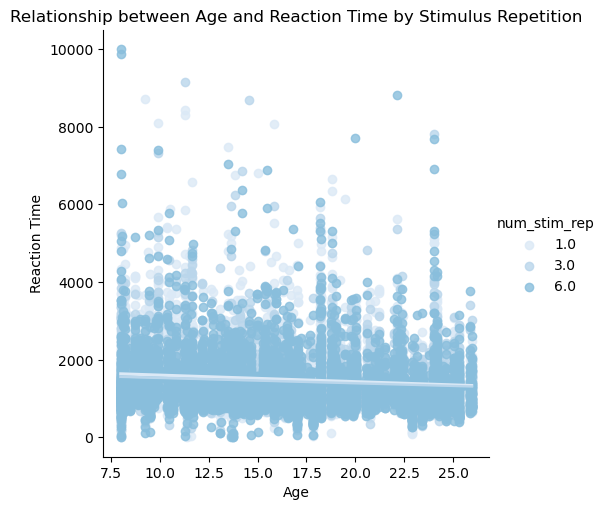

In [56]:
# Scatter plots of reaction time against age for each level of stimulus repetition
plt.figure(figsize=(10, 8))
sns.lmplot(x='age', y='rt', hue='num_stim_rep', data=memory_merged)
plt.title('Relationship between Age and Reaction Time by Stimulus Repetition')
plt.xlabel('Age')
plt.ylabel('Reaction Time')
plt.show()

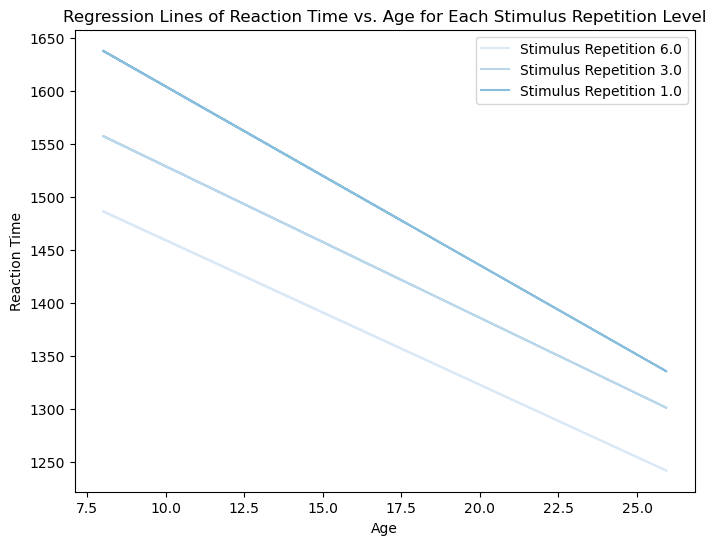

In [57]:
plt.figure(figsize=(8, 6))
for repetition, model in regression_results.items():
    plt.plot(selected_data[selected_data['num_stim_rep'] == repetition]['age'], model.predict(), label=f"Stimulus Repetition {repetition}")
plt.xlabel('Age')
plt.ylabel('Reaction Time')
plt.title('Regression Lines of Reaction Time vs. Age for Each Stimulus Repetition Level')
plt.legend()
plt.show()

## Visualisation

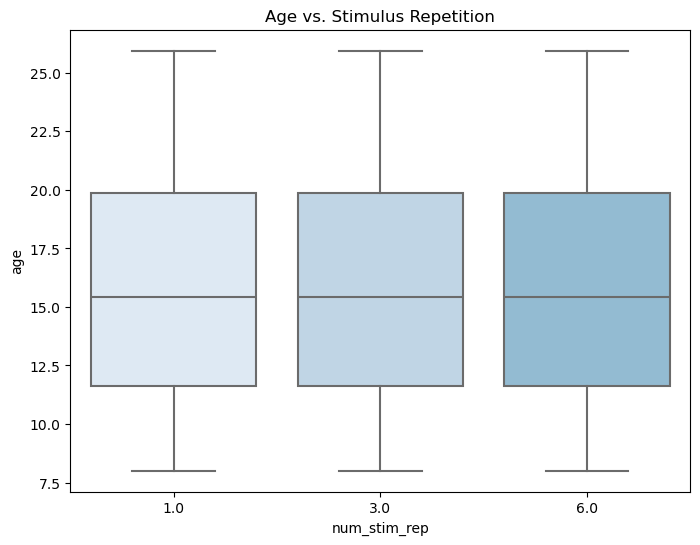

In [58]:
# Box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='num_stim_rep', y='age', data=memory_merged)
plt.title('Age vs. Stimulus Repetition')
plt.show()


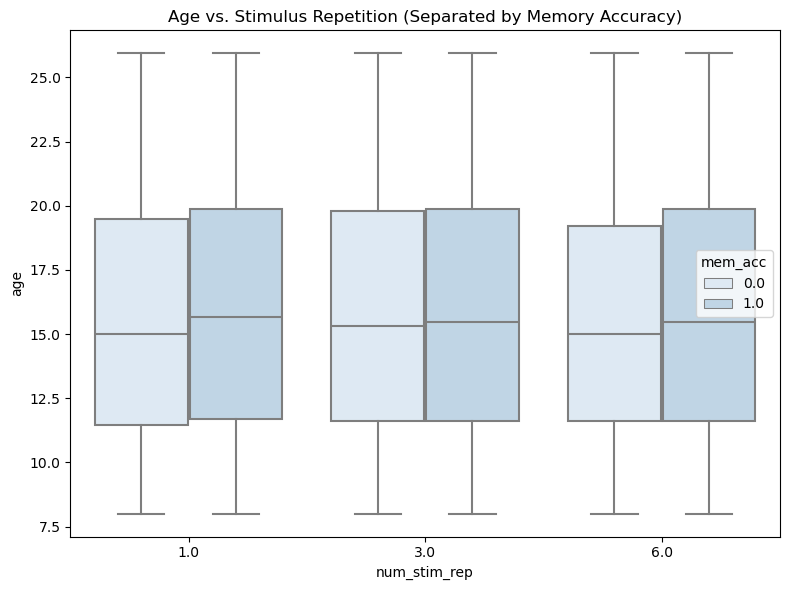

In [59]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='num_stim_rep', y='age', hue='mem_acc', data=memory_merged)
plt.title('Age vs. Stimulus Repetition (Separated by Memory Accuracy)')
plt.tight_layout()
plt.show()

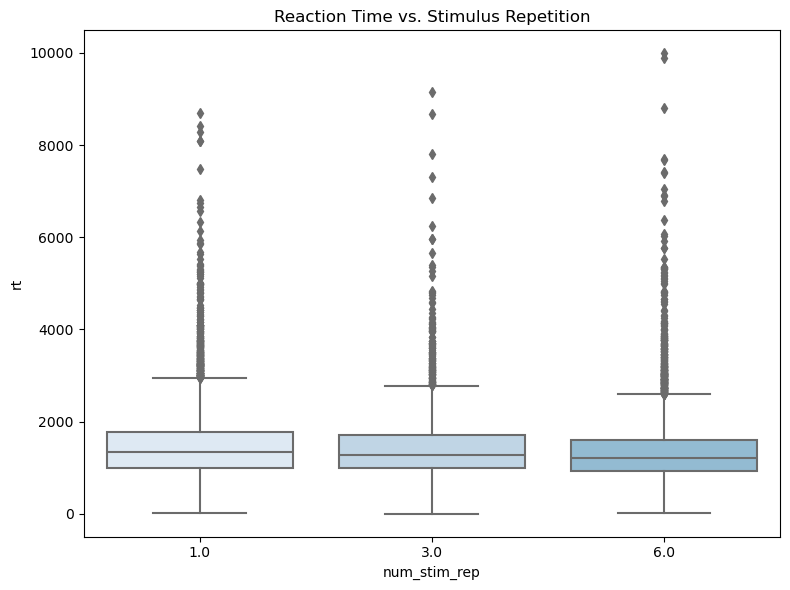

In [60]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='num_stim_rep', y='rt', data=memory_merged)
plt.title('Reaction Time vs. Stimulus Repetition')
plt.tight_layout()
plt.show()
